In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
df = pd.read_csv("C:/Users/sahay/Desktop/ML/Projects/Insurance Premium project/insurance (1).csv")

In [14]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [16]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [17]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


### Univariate Analysis

In [18]:
#binning age into categories
bins=[0,20,30,40,50,60,float('inf')]
labels=['<20 yrs','20 - 30 yrs','30 - 40 yrs','40 - 50 yrs', '50 - 60 yrs', '>60 yrs']
df['Age_category']=pd.cut(df['Age'],bins=bins,labels=labels)

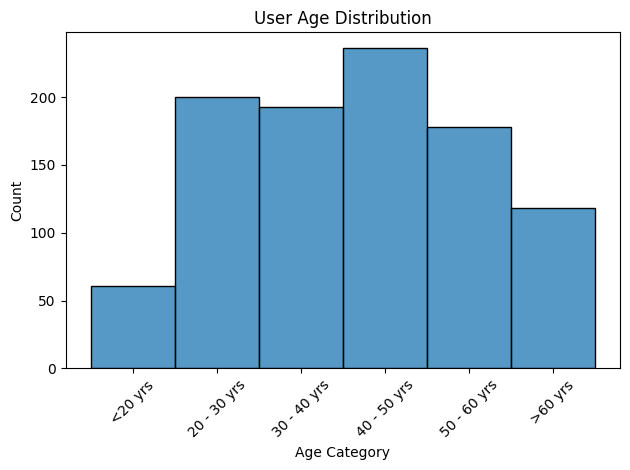

In [19]:
sns.histplot(x='Age_category',data=df)
plt.title('User Age Distribution')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- The graph is almost uniformly distributed
- Most of the customers are in the age range of 20 to 60 yrs
- Some customers are even younger than 20 yrs 

In [20]:
#binning height into categories
bins=[0,144,150,160,170,float('inf')]
labels =['<144 cm','144-150 cm','150-160 cm','160-170 cm','>170']
df['Height_Category'] = pd.cut(df['Height'], bins=bins, labels=labels)


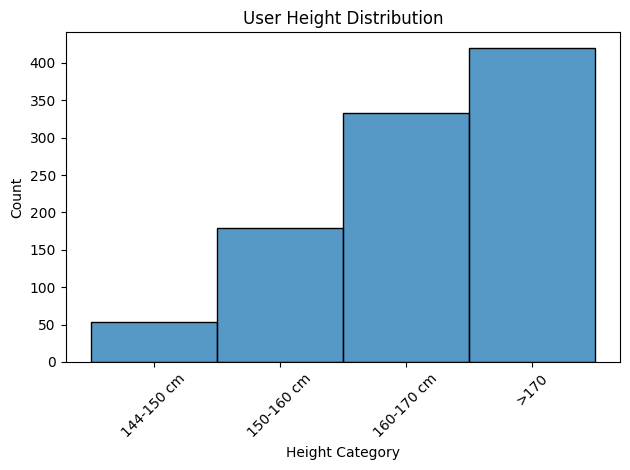

In [21]:
sns.histplot(x='Height_Category', data=df)
plt.title('User Height Distribution')
plt.xlabel('Height Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The distribution of Height Category is Left-skewed
- Most of the user are >170 cm ht.
- There is gradual increase in the distribution of height

In [22]:
df['Weight'].max()

np.int64(132)

In [23]:
bins=[0,50,70,90,110,130,140]
labels=['< 50 kgs','50-70 kgs','70-90 kgs','90-110 kgs','110-130 kgs','130-140 kgs']
df['weight_category']=pd.cut(df['Weight'],labels=labels,bins=bins)

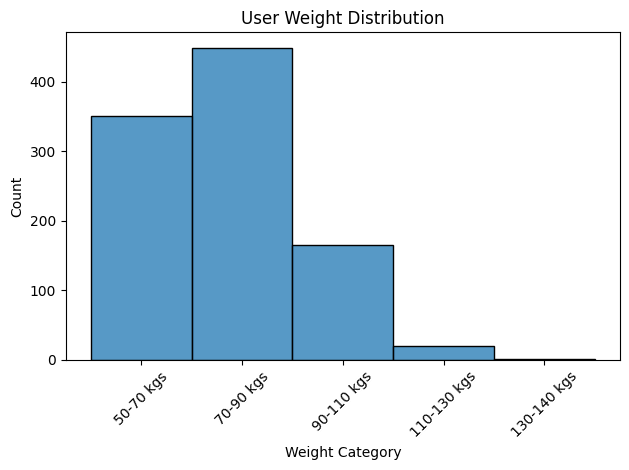

In [24]:
sns.histplot(x='weight_category', data=df)
plt.title('User Weight Distribution')
plt.xlabel('Weight Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- The weight data is skewed little towards the right
- Most of the users lie in 50-90kg category
- There are afew outliers as well who hav a wieght greater than 130 kgs

In [25]:
bins=[0,15000,20000,25000,30000,35000,40000,float('inf')]
labels=['< 15000', '15000-20000','20000-25000','25000-30000','30000-35000','35000-4000','>40000']
df['PremiumPrice_category']=pd.cut(df['PremiumPrice'],labels=labels,bins=bins)

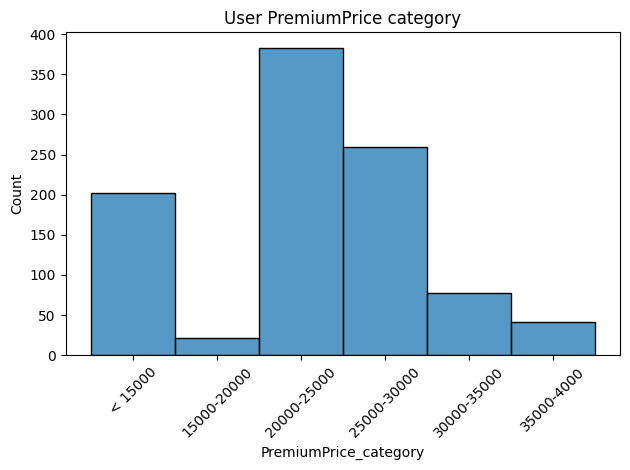

In [26]:
sns.histplot(x='PremiumPrice_category', data=df)
plt.title('User PremiumPrice category')
plt.xlabel('PremiumPrice_category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- maximum number of customers have their Premium Prices between 20k to 25k followed by 25k to 30k
- There is a peak at 15k pointing large chunk of customers falling in this category as well

In [27]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Age_category,Height_Category,weight_category,PremiumPrice_category
0,45,0,0,0,0,155,57,0,0,0,25000,40 - 50 yrs,150-160 cm,50-70 kgs,20000-25000
1,60,1,0,0,0,180,73,0,0,0,29000,50 - 60 yrs,>170,70-90 kgs,25000-30000
2,36,1,1,0,0,158,59,0,0,1,23000,30 - 40 yrs,150-160 cm,50-70 kgs,20000-25000
3,52,1,1,0,1,183,93,0,0,2,28000,50 - 60 yrs,>170,90-110 kgs,25000-30000
4,38,0,0,0,1,166,88,0,0,1,23000,30 - 40 yrs,160-170 cm,70-90 kgs,20000-25000


C:\Users\sahay\AppData\Local\Temp\ipykernel_2968\2538790160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diabetes',palette={'1': '#D7263D', '0': '#1B998B'})


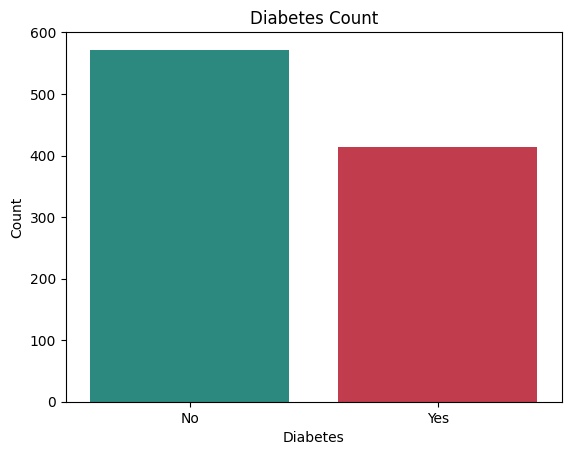

In [28]:
sns.countplot(data=df, x='Diabetes',palette={'1': '#D7263D', '0': '#1B998B'})
plt.title("Diabetes Count")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


C:\Users\sahay\AppData\Local\Temp\ipykernel_2968\2331376787.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BloodPressureProblems',palette={'1': '#D7263D', '0': '#1B998B'})


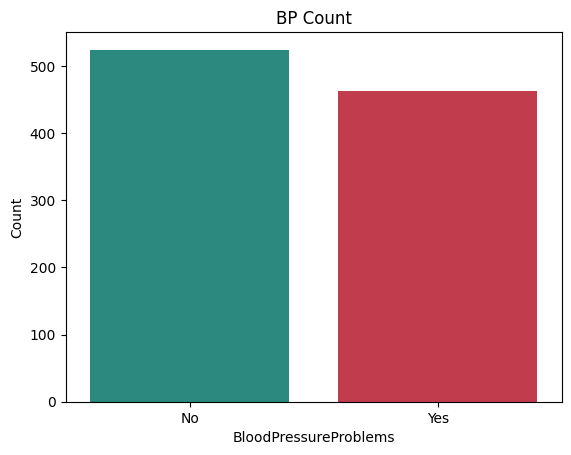

In [29]:
sns.countplot(data=df, x='BloodPressureProblems',palette={'1': '#D7263D', '0': '#1B998B'})
plt.title("BP Count")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


C:\Users\sahay\AppData\Local\Temp\ipykernel_2968\3865970989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AnyTransplants',palette={'1': '#D7263D', '0': '#1B998B'})


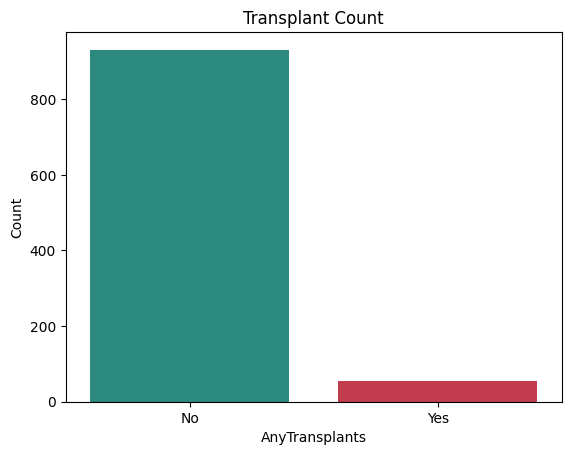

In [30]:
sns.countplot(data=df, x='AnyTransplants',palette={'1': '#D7263D', '0': '#1B998B'})
plt.title("Transplant Count")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


C:\Users\sahay\AppData\Local\Temp\ipykernel_2968\2675281144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='KnownAllergies',palette={'1': '#D7263D', '0': '#1B998B'})


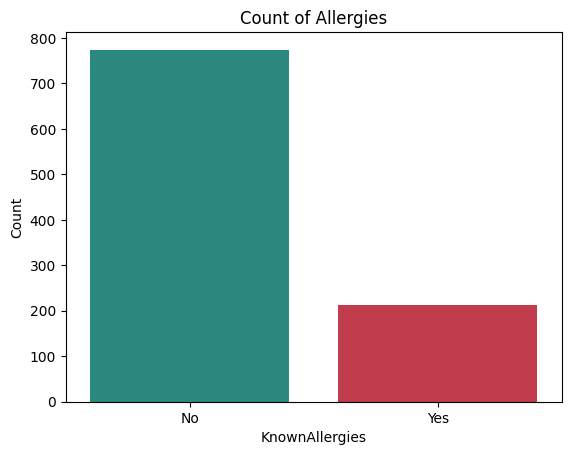

In [31]:
sns.countplot(data=df, x='KnownAllergies',palette={'1': '#D7263D', '0': '#1B998B'})
plt.title("Count of Allergies")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


C:\Users\sahay\AppData\Local\Temp\ipykernel_2968\2459351536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HistoryOfCancerInFamily',palette={'1': '#D7263D', '0': '#1B998B'})


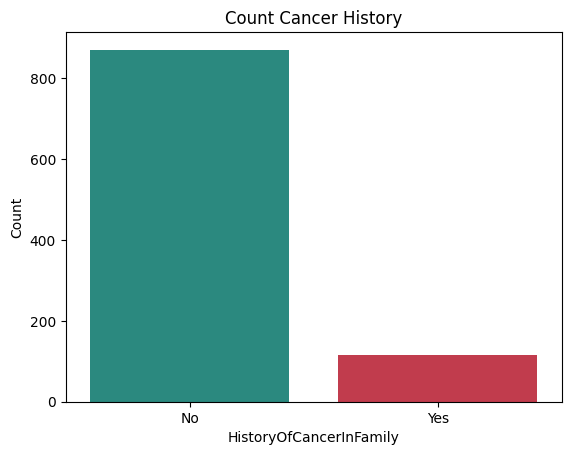

In [32]:
sns.countplot(data=df, x='HistoryOfCancerInFamily',palette={'1': '#D7263D', '0': '#1B998B'})
plt.title("Count Cancer History")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


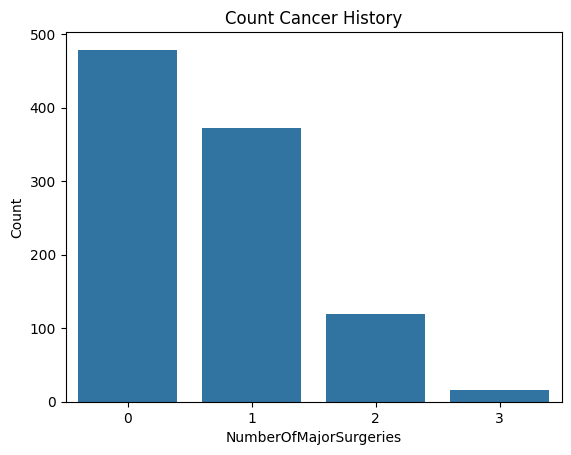

In [33]:
sns.countplot(data=df, x='NumberOfMajorSurgeries')
plt.title("Count Cancer History")
plt.ylabel("Count")
#plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


<Axes: xlabel='Height'>

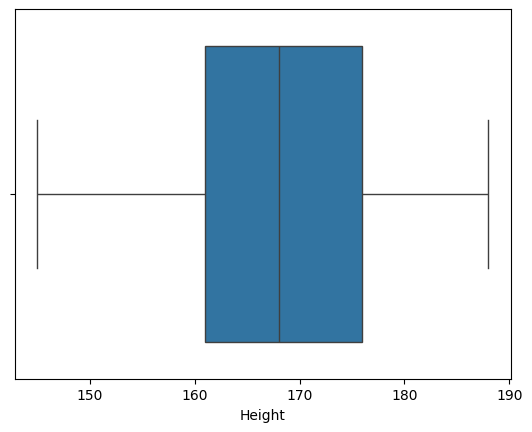

In [34]:
sns.boxplot(data=df,x='Height')

## Bi-variate Analysis

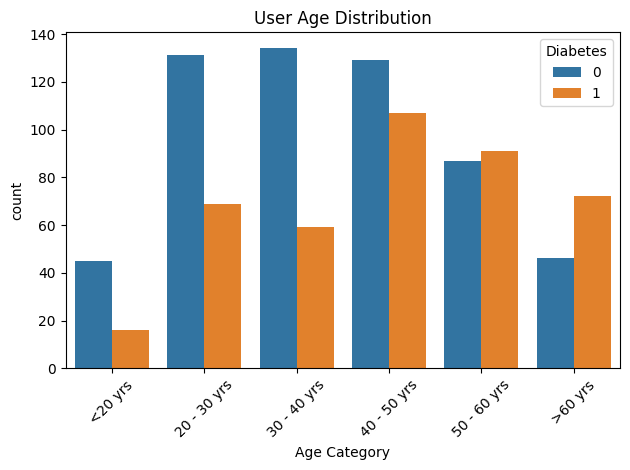

In [35]:
sns.countplot(x='Age_category',data=df,hue='Diabetes')
plt.title('User Age Distribution')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- Diabetes is prevalent among customers of all ages
- Customers whoa are below 40yrs. of age are at a lower risk of having diabetes
- Customer beyond 40yrs. and specifically beyond 60yrs. are most prone to diabetes

In [36]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Age_category'], df['Diabetes'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Optional: interpret result
alpha = 0.05
if p < alpha:
    print("✅ Reject null hypothesis: There is a significant association between age and diabetes.")
else:
    print("❌ Fail to reject null: No significant association between age and diabetes.")

Chi-square statistic: 45.88118804509084
Degrees of freedom: 5
P-value: 9.602252979807908e-09
✅ Reject null hypothesis: There is a significant association between age and diabetes.


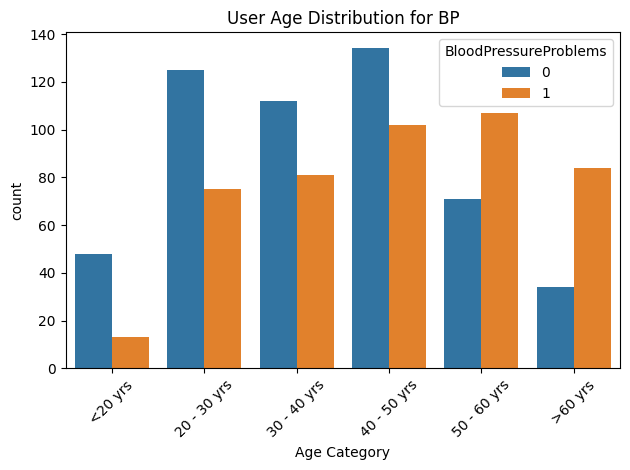

In [37]:
sns.countplot(x='Age_category',data=df,hue='BloodPressureProblems')
plt.title('User Age Distribution for BP')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- There is a sharp increase in Blood Pressure issue of customer past 20yrs of age
- BP problems are less prevalent among youn customers
- People in their mid-age between 30 to 50 yrs of age have increasingly higher BP problems
- In >60 yrs, the difference is even more striking — far more users have BP issues.
- This pattern supports the well-established health trend: risk of BP problems increases with age.

In [38]:

# Create a contingency table
contingency_table = pd.crosstab(df['Age_category'], df['BloodPressureProblems'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Optional: interpret result
alpha = 0.05
if p < alpha:
    print("✅ Reject null hypothesis: There is a significant association between age and BloodPressureProblems.")
else:
    print("❌ Fail to reject null: No significant association between age and BloodPressureProblems.")

Chi-square statistic: 66.73284164056821
Degrees of freedom: 5
P-value: 4.8960901955693e-13
✅ Reject null hypothesis: There is a significant association between age and BloodPressureProblems.


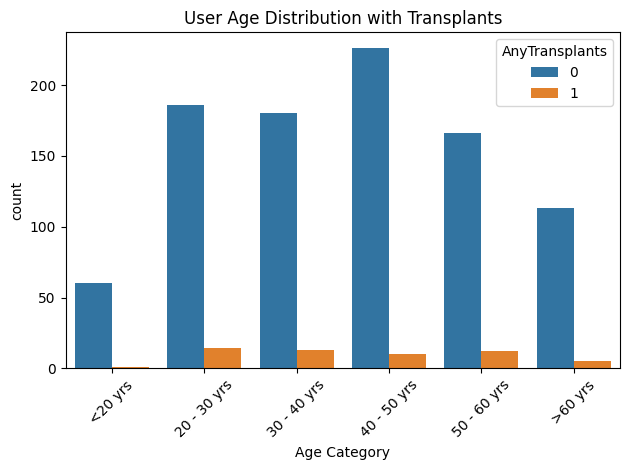

In [39]:
sns.countplot(x='Age_category',data=df,hue='AnyTransplants')
plt.title('User Age Distribution with Transplants')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- Age doesn't seem to be related to users who have received any transplants
- However users below 20yrs have the least count of transplants
- Users in the range of 20 to 60 yrs have had most of the transplants

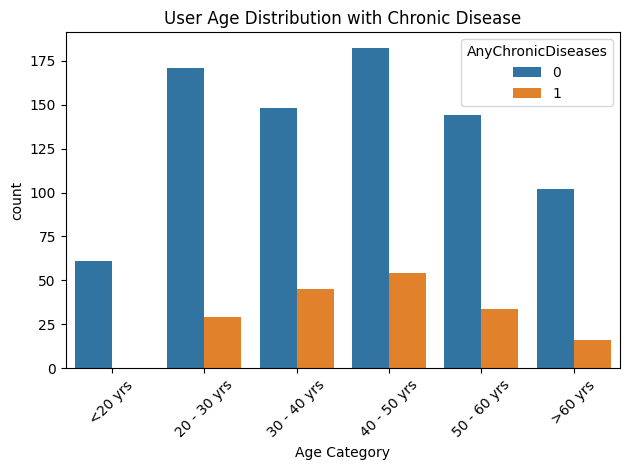

In [40]:
sns.countplot(x='Age_category',data=df,hue='AnyChronicDiseases')
plt.title('User Age Distribution with Chronic Disease')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:
- Chronic Diseases don't affect young customers below 20yrs
- Customers in the range of 40-50 yrs of age have the highest chances of chronic diseases

In [41]:
#Checking if age groups have a statistical relation as seen in the previous graph:
df['Age_Bracket'] = df['Age'].apply(lambda x: '<50' if 16<=x <=50 else '>50')

contingency= pd.crosstab(df['Age_Bracket'],df['AnyChronicDiseases'])
chi2,p,dof,expected=chi2_contingency(contingency)

print("Chi-square value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

# Interpretation
if p < 0.05:
    print("✅ Statistically significant difference in chronic disease prevalence between age groups.")
else:
    print("❌ No significant difference between the groups.")


Chi-square value: 0.2813208274844734
P-value: 0.5958368036831503
Degrees of freedom: 1
❌ No significant difference between the groups.


In [42]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Age_category', 'Height_Category', 'weight_category',
       'PremiumPrice_category', 'Age_Bracket'],
      dtype='object')